In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob



In [8]:
def most_common_non_black_pixel(hist):
    non_black_hist = hist[1:]
    most_common_pixel_value = np.argmax(non_black_hist)
    return most_common_pixel_value


In [9]:
def highlight_most_visible_color(background, most_common_pixel_value, variance=10):
    gray_background = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)
    lower_bound = max(0, most_common_pixel_value - variance)
    upper_bound = min(255, most_common_pixel_value + variance)
    mask = cv2.inRange(gray_background, np.array([lower_bound]), np.array([upper_bound]))
    highlighted_image = cv2.bitwise_and(background, background, mask=mask)
    return highlighted_image


In [10]:
def is_plain_colored_background(background, variance=10):
    # Convert the background to grayscale
    gray_background = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)

    # Compute histogram of grayscale values
    hist = cv2.calcHist([gray_background], [0], None, [256], [0, 256])

    # Exclude black pixels from the histogram calculation
    black_pixels = hist[0]
    total_black_pixels = int(black_pixels[0])

    # Find the most common non-black grayscale value
    most_common_pixel_value = most_common_non_black_pixel(hist)

    # Calculate the percentage of the most common pixel value among non-black pixels
    total_non_black_pixels = gray_background.size - total_black_pixels
    most_common_pixel_count = hist[most_common_pixel_value + 1]  # +1 to account for excluding black pixels
    percentage = (most_common_pixel_count / total_non_black_pixels) * 100

    # Highlight the most visible color pixels with variance
    highlighted_image = highlight_most_visible_color(background, most_common_pixel_value, variance)

    # Calculate the percentage of highlighted pixels within variance
    highlighted_gray = cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2GRAY)
    highlighted_pixels = np.count_nonzero(highlighted_gray)
    percentage_within_variance = (highlighted_pixels / total_non_black_pixels) * 100
    # print(percentage_within_variance)

    # Display the highlighted image
    # cv2.imshow("Highlighted Image", highlighted_image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    # Check if the percentage within variance is above a threshold
    return percentage_within_variance <= 90, highlighted_image, percentage_within_variance  # Adjust the threshold as needed



In [12]:
def get_background(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Create a mask (initialized as background)
    mask = np.zeros(image.shape[:2], np.uint8)

    # Create background and foreground models for GrabCut
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    # Define a rectangle around the object to help GrabCut initialize
    rect = (10, 10, image.shape[1] - 10, image.shape[0] - 10)

    # Apply GrabCut algorithm
    cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

    # Modify the mask to consider certain regions as probable foreground
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

    # Multiply the mask with the input image to get the foreground
    foreground = image * mask2[:, :, np.newaxis]
    background = image - foreground

    return background


# Run for a bulk

True


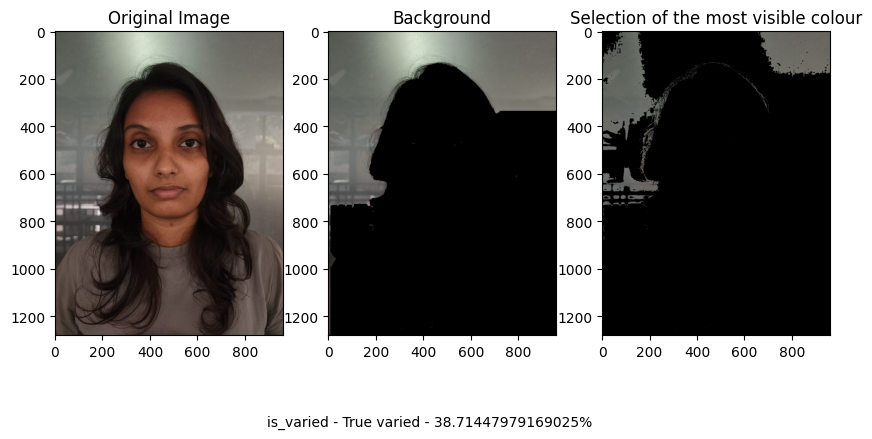

True


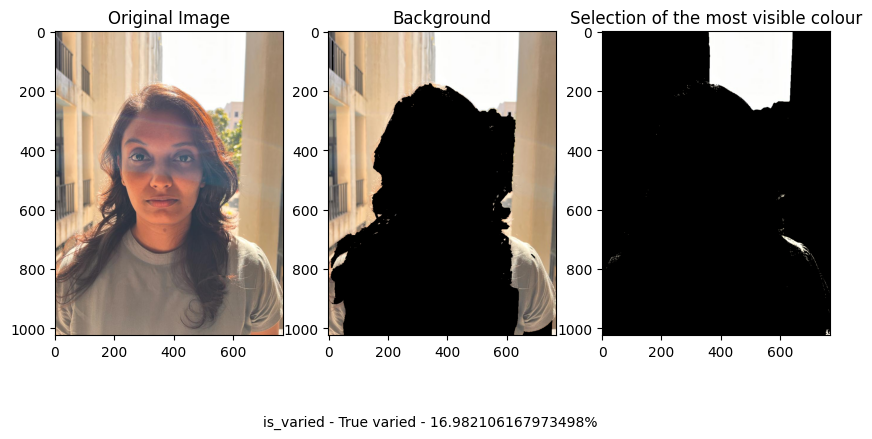

True


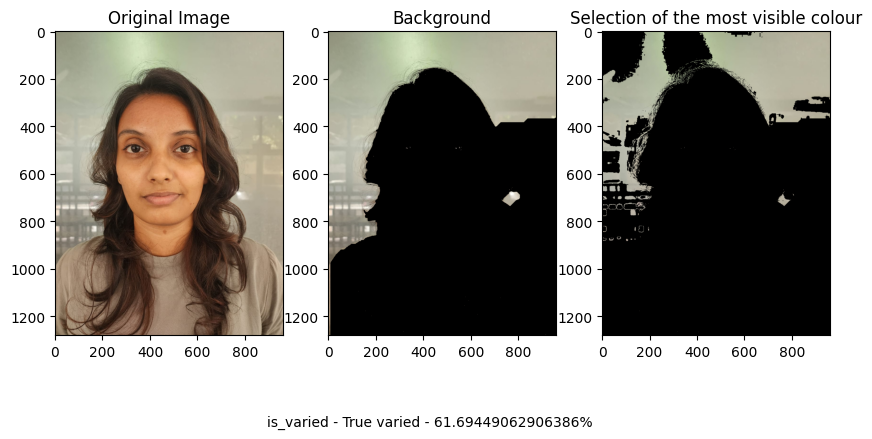

True


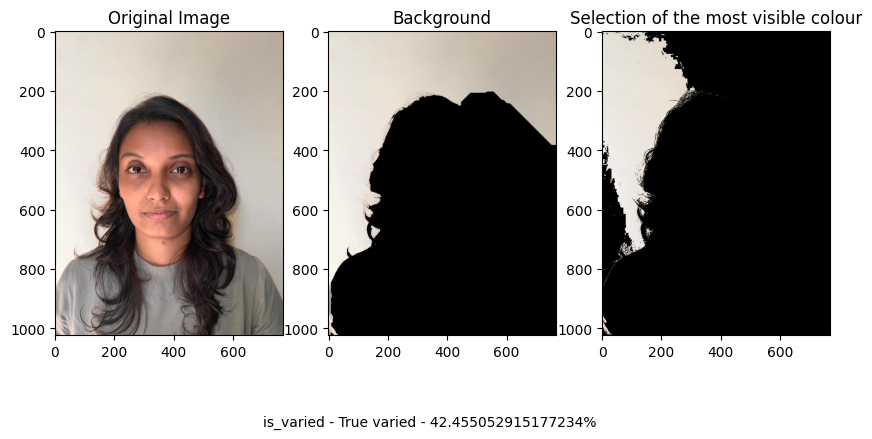

True


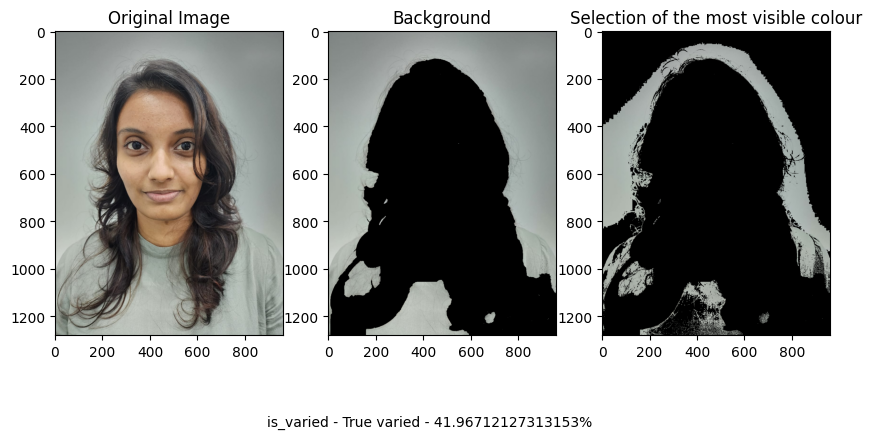

True


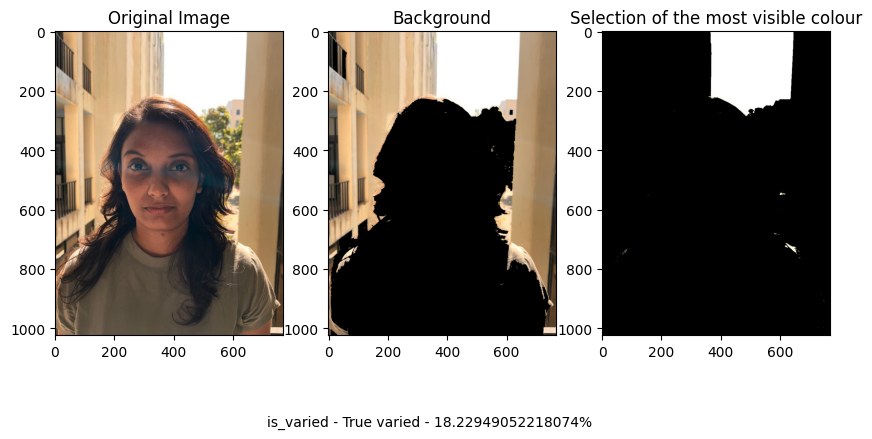

True


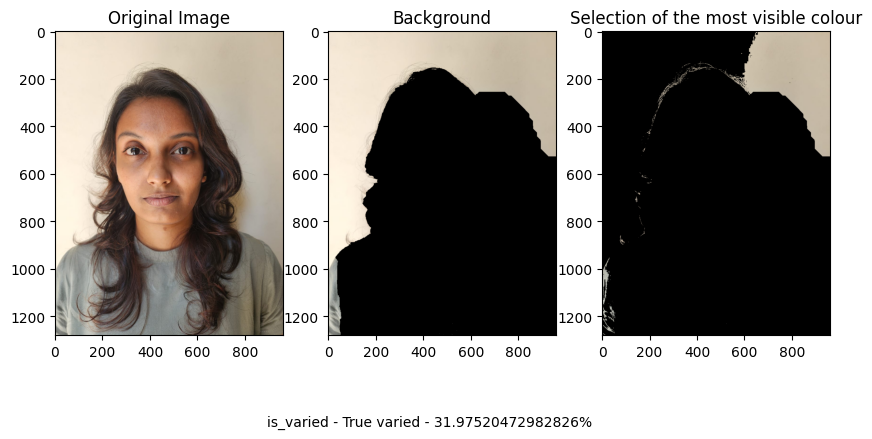

True


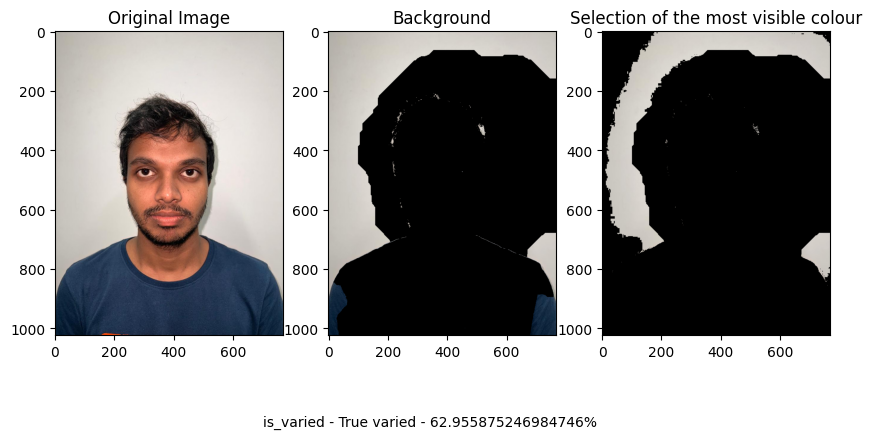

False


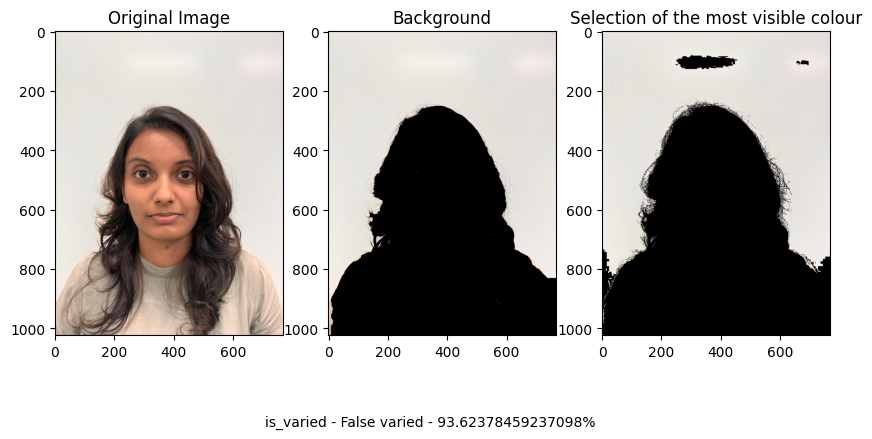

True


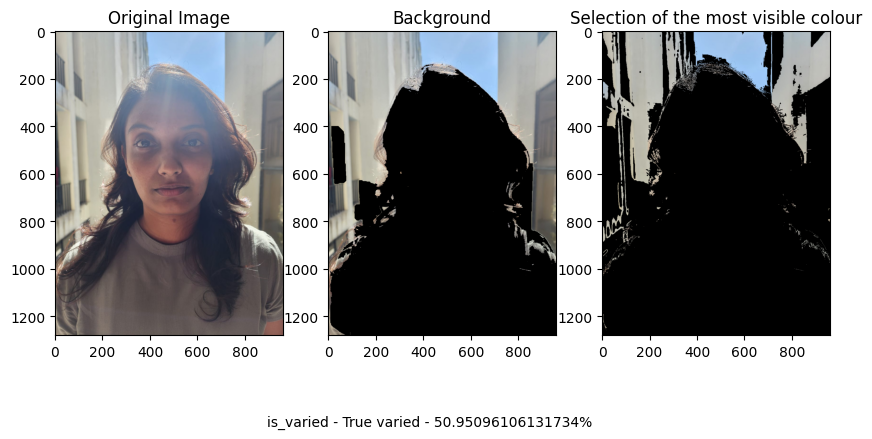

True


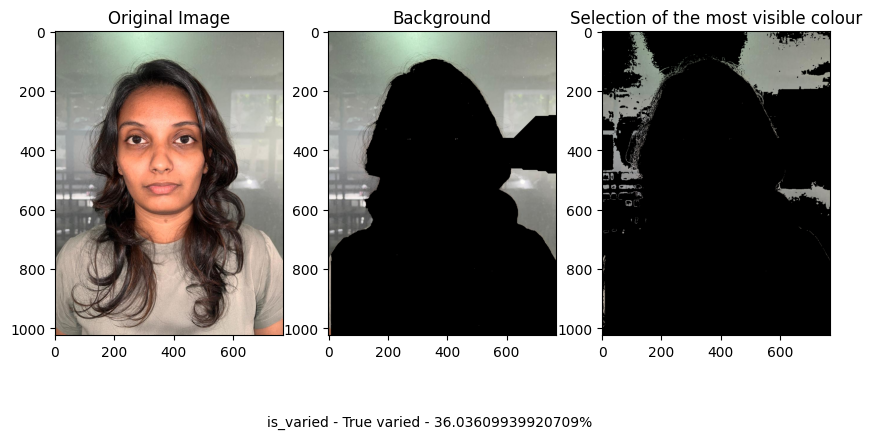

True


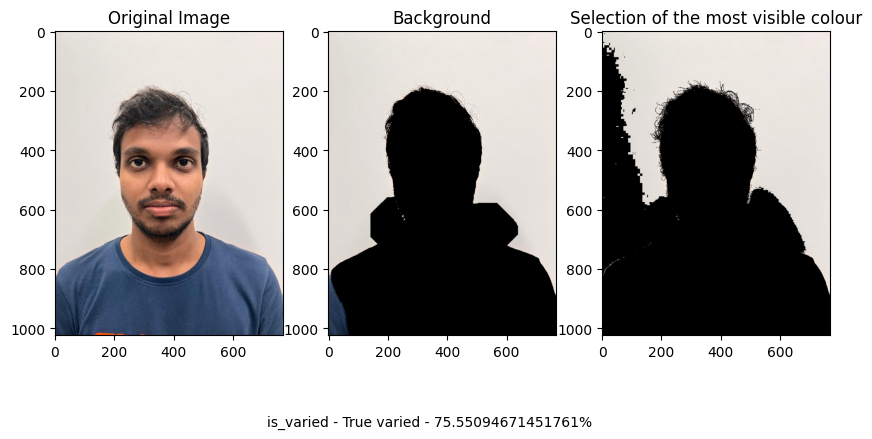

True


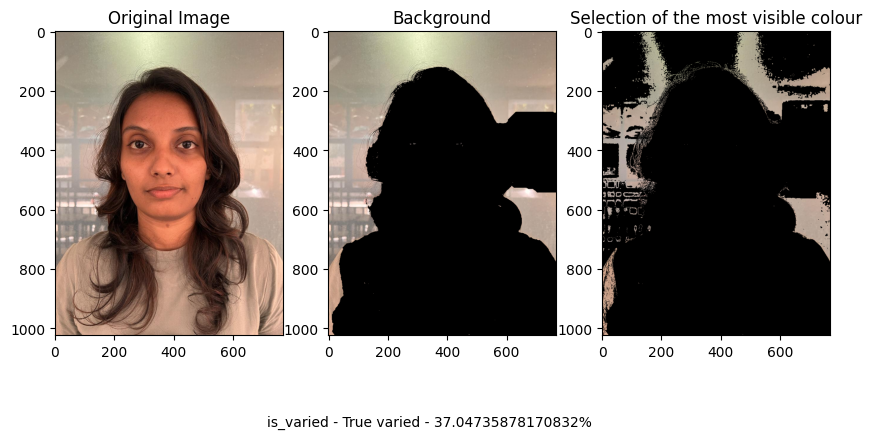

True


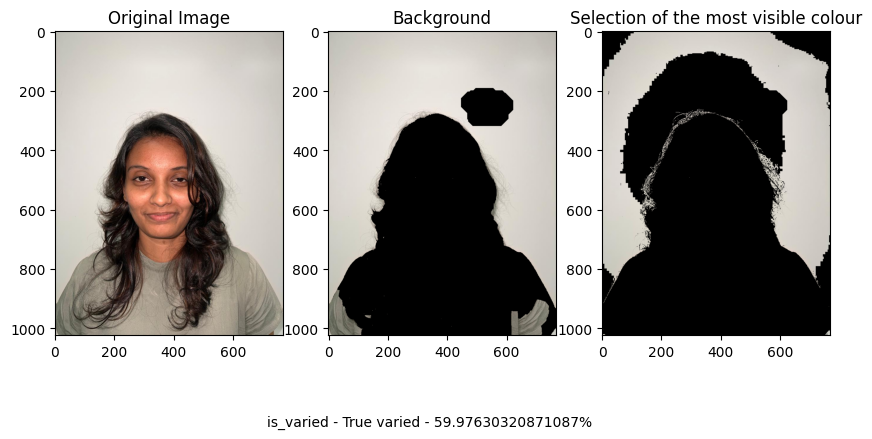

In [17]:
path = '/Users/raminduwalgama/Downloads/Dataset'
# all_images = glob.glob(path + "/*.jpeg")
all_images = glob.glob(path + "/*")
# all_images = [image for image in all_images if "WhatsApp Image 2023-08-16 at 14.45.07.jpeg" in image]
# print(all_images)

for image_path in all_images:
# image_path = "/Users/raminduwalgama/Downloads/WhatsApp Image 2023-08-16 at 14.34.28 (2).jpeg"  # Replace with the path to your image
    output_image = get_background(image_path)

    # Display the original and processed images
    is_varied_bg, varied_bg_image, variance = is_plain_colored_background(output_image)
    print(is_varied_bg)
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
    ax1.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    ax1.set_title("Original Image")
    ax2.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    ax2.set_title("Background")
    ax3.imshow(cv2.cvtColor(varied_bg_image, cv2.COLOR_BGR2RGB))
    ax3.set_title("Selection of the most visible colour")
    text = "is_varied - " + str(is_varied_bg) + " varied - " + str(variance) + "%"
    plt.figtext(0.5, 0.01, text, ha="center")
    plt.savefig("image_segmentation-2.png")
    plt.show()


## Run for an image

True


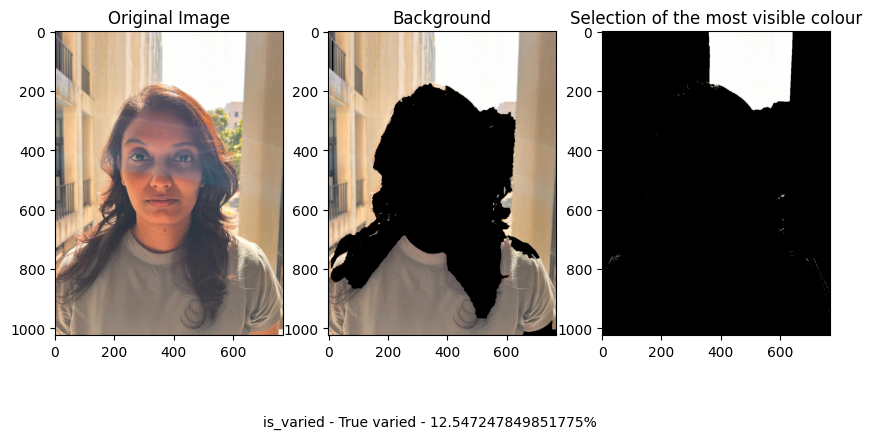

In [16]:
image_path = '/Users/raminduwalgama/Downloads/Dataset/WhatsApp Image 2023-08-16 at 14.43.09 (4).jpeg'

output_image = get_background(image_path)

# Display the original and processed images
is_varied_bg, varied_bg_image, variance = is_plain_colored_background(output_image)
print(is_varied_bg)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
ax1.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")
ax2.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
ax2.set_title("Background")
ax3.imshow(cv2.cvtColor(varied_bg_image, cv2.COLOR_BGR2RGB))
ax3.set_title("Selection of the most visible colour")
text = "is_varied - " + str(is_varied_bg) + " varied - " + str(variance) + "%"
plt.figtext(0.5, 0.01, text, ha="center")
plt.savefig("image_segmentation-2.png")
plt.show()
